In [3]:
# import google
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

X.shape is (12288, 307)
./plate_number/02E-225AK.jpg
Proceed 0 of 307
./plate_number/02E-48AK.jpg
./plate_number/05A-05AK.jpg
./plate_number/0K959-TTU.jpg
./plate_number/305-4929.jpg
./plate_number/50K-26FG.jpg
./plate_number/AA344-NSR.jpg
./plate_number/AA689-GDM.JPG
./plate_number/AA689-GGE.jpg
./plate_number/AAA-252EA.jpg
./plate_number/AAA-378AA.jpeg
./plate_number/AAA-474EC.jpg
./plate_number/AAA-878EQ.jpg
./plate_number/ABC-323AG.jpg
./plate_number/ABJ-585MB.jpg
./plate_number/ABJ-624PY.jpg
./plate_number/ABJ-669NS.jpg
./plate_number/ABK-308XA.jpg
./plate_number/ABK-505US.jpg
./plate_number/ABK-544AA.jpg
./plate_number/ABK-754AA.jpg
./plate_number/ABT-322AA.jpg
./plate_number/ACH-538AA.jpeg
./plate_number/AE192-KPU.jpg
./plate_number/AE249-NND.jpg
./plate_number/AED-568AA.jpg
./plate_number/AEE-43XA.jpg
./plate_number/AFG-397AA.jpg
./plate_number/AFG-57XA.jpg
./plate_number/AFH-407AA.jpg
./plate_number/AFH-798QB.jpg
./plate_number/AFR-584AA.jpg
./plate_number/AG887-MKR.jpg
./plat

./negative_images/image_27.jpg
./negative_images/image_28.jpg
./negative_images/image_29.jpg
./negative_images/image_3.jpg
./negative_images/image_30.jpg
./negative_images/image_31.jpg
./negative_images/image_32.jpg
./negative_images/image_33.jpeg
./negative_images/image_34.jpg
./negative_images/image_35.jpg
./negative_images/image_36.jpeg
./negative_images/image_37.jpg
./negative_images/image_38.jpg
./negative_images/image_39.jpg
./negative_images/image_4.png
./negative_images/image_40.jpg
./negative_images/image_41.png
./negative_images/image_42.jpg
./negative_images/image_43.jpg
./negative_images/image_44.jpg
./negative_images/image_45.jpeg
./negative_images/image_46.jpeg
./negative_images/image_47.jpg
./negative_images/image_48.jpg
./negative_images/image_49.jpg
./negative_images/image_5.png
./negative_images/image_50.jpg
./negative_images/image_6.png
./negative_images/image_7.jpg
./negative_images/image_8.jpg
./negative_images/image_9.jpg


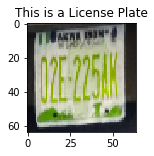

In [6]:
import os, cv2, itertools 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

PLATE_NO_DIR = './plate_number/'
NEG_IMG_DIR = './negative_images/'

ROWS = 64
COLS = 64
CHANNELS = 3

plate_no_images = [PLATE_NO_DIR + i for i in os.listdir(PLATE_NO_DIR)]
neg_img = [NEG_IMG_DIR + i for i in os.listdir(NEG_IMG_DIR)]


def read_image(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS), interpolation = cv2.INTER_CUBIC)

def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  
  X = np.ndarray((n_x,m), dtype = np.uint8)
  y = np.zeros((1,m))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images):
    print(image_file)
    image = read_image(image_file)
    X[:,i] = np.squeeze(image.reshape((n_x,1)))
    if '-' in image_file.lower() :
      y[0,i] = 1
    elif 'image' in image_file.lower() :
      y[0,i] = 0
    else : # for test data
      y[0,i] = image_file.split('/')[-1].split('.')[0]
      
    if i%5000 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y


X_img, y_img = prep_data(plate_no_images + neg_img)

classes = {0: 'Normal Image',
           1: 'License Plate'}

def show_images(X, y, idx) :
  image = X[idx]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("This is a {}".format(classes[y[idx,0]]))
  plt.show()
  
show_images(X_img.T, y_img.T, 0)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the n

Model accuracy: 100.00%


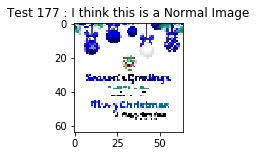

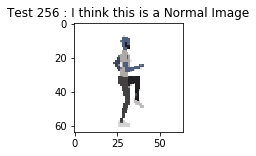

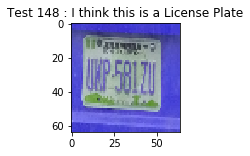

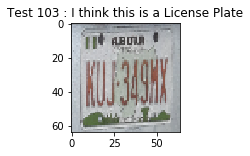

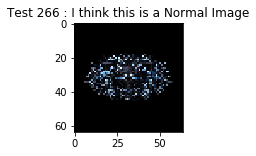

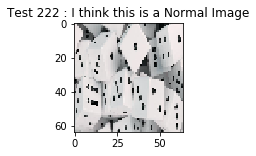

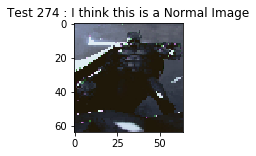

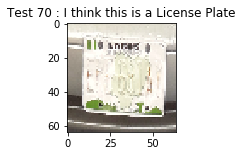

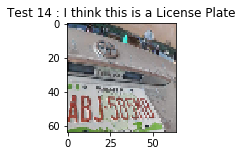

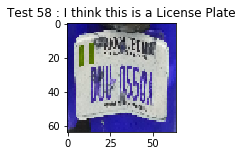

In [5]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV()

X_img_lr, y_img_lr = X_img.T, y_img.T.ravel()

clf.fit(X_img_lr,y_img_lr)

print("Model accuracy: {:.2f}%".format(clf.score(X_img_lr, y_img_lr)*100))

def show_image_prediction(X, idx, model) :
  image = X[idx].reshape(1,-1)
  image_class = classes[model.predict(image).item()]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize = (4,2))
  plt.imshow(image)
  plt.title("Test {} : I think this is a {}".format(idx, image_class))
  plt.show()
  
X_img_lr, y_img_lr = X_img.T, y_img.T

for i in np.random.randint(0, len(X_img_lr), 10) :
  show_image_prediction(X_img_lr, i, clf)